## Análise de Dados - Gastos Farmacêuticos por País

O Dataset utilizado contém informações sobre Gastos Farmacêuticos por país, cobrindo 50 países com dados que variam de 1970 à 2022. Ele inclui um intersecção de dados completos sobre os gastos em cada País para a década de 2011-2020.

In [1]:
# Bibliotecas 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Carregando dataset
df = pd.read_csv('dataset.csv')

In [4]:
df.shape

(1788, 7)

In [5]:
df.columns

Index(['LOCATION', 'TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'FlAG_CODES',
       'TOTAL_SPEND'],
      dtype='object')

In [6]:
df.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FlAG_CODES,TOTAL_SPEND
0,ARG,2004,48.178,-3.414784,12303.221538,A,477560.81
1,ARG,2005,48.558,1.080000,13681.225871,A,536533.75
2,ARG,2006,47.395,7.640000,15090.095978,A,597901.52
3,ARG,2007,31.286,7.835000,16728.642814,A,669426.13
4,ARG,2008,30.262,0.220000,17567.142054,A,710136.75


In [7]:
# Renomeando colunas
df.rename(columns={'LOCATION':'PAIS', 'TIME':'ANO', 'PC_HEALTHXP':'PCT_GASTO_SAUDE',
                   'PC_GDP':'PCT_GASTO_PIB', 'USD_CAP':'GASTO_PERCAPITA', 'FlAG_CODES':'COD_FLAG',
       'TOTAL_SPEND':'GASTO_TOTAL'}, inplace=True)

In [13]:
# Colunas renomeadas
df.columns

Index(['PAIS', 'ANO', 'PCT_GASTO_SAUDE', 'PCT_GASTO_PIB', 'GASTO_PERCAPITA',
       'COD_FLAG', 'GASTO_TOTAL'],
      dtype='object')

In [9]:
df.info() # mostra que os dados não precisarão de tratamento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PAIS             1788 non-null   object 
 1   ANO              1788 non-null   int64  
 2   PCT_GASTO_SAUDE  1788 non-null   float64
 3   PCT_GASTO_PIB    1788 non-null   float64
 4   GASTO_PERCAPITA  1788 non-null   float64
 5   COD_FLAG         1788 non-null   object 
 6   GASTO_TOTAL      1788 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 97.9+ KB


### Achando e comprovando janela temporal comum entre os países.

In [20]:
# 1. Agrupar por país e obter os anos únicos para cada país
anos_por_pais = df.groupby('PAIS')['ANO'].unique()

# 2. Encontrar a interseção de anos para todos os países
anos_comuns = set.intersection(*(set(anos) for anos in anos_por_pais))

# 3. Filtrar o DataFrame para incluir apenas os anos que aparecem para cada país
df_filtrado = df[df['ANO'].isin(anos_comuns)]

# Exibir o DataFrame filtrado
df_filtrado.head(10)

,PAIS,ANO,PCT_GASTO_SAUDE,PCT_GASTO_PIB,GASTO_PERCAPITA,COD_FLAG,GASTO_TOTAL
7,ARG,2011,60.391,2.533000,682.647,A,28487.31
8,ARG,2012,37.480,-2.430629,1144.778,A,48265.81
9,ARG,2013,35.961,0.940000,1209.008,A,51482.53
10,ARG,2014,34.225,9.671000,1828.845,A,78684.36
11,ARG,2015,25.932,10.229000,417.891,A,18168.65
12,ARG,2016,29.569,0.290000,521.631,A,22899.76
13,ARG,2017,63.629,1.320000,659.479,A,29207.60
14,ARG,2018,61.704,1.090000,880.730,A,39328.89
15,ARG,2019,62.605,2.588000,842.902,A,37908.22
16,ARG,2020,33.454,-1.214675,1443.829,A,65249.47


In [21]:
df_filtrado.tail(10)

,PAIS,ANO,PCT_GASTO_SAUDE,PCT_GASTO_PIB,GASTO_PERCAPITA,COD_FLAG,GASTO_TOTAL
1778,ZAF,2011,46.474,21.180857,11493.283417,A,609088.91
1779,ZAF,2012,7.722,1.013657,1105.479000,A,59455.50
1780,ZAF,2013,45.652,54.240000,13787.935830,A,753907.66
1781,ZAF,2014,46.238,0.709866,1108.303000,A,61615.93
1782,ZAF,2015,46.607,-3.672128,536.733000,A,30445.39
1783,ZAF,2016,5.786,0.310000,67.313000,A,3854.31
1784,ZAF,2017,46.945,2.607000,11920.293955,A,687028.07
1785,ZAF,2018,5.828,27.497037,559.760000,A,32809.21
1786,ZAF,2019,5.719,0.020000,12408.769331,A,739412.32
1787,ZAF,2020,49.060,0.851611,702.082000,A,42519.76


Conclusão: A janela em comum é de 2011 a 2020.

In [26]:
# Exportando arquivo com dataset filtrado
df_filtrado = df[(df['ANO'] >= 2011) & (df['ANO'] <= 2020)]

df_filtrado.to_csv('dataset_filtrado.csv', index=False)

print("Arquivo 'dataset_filtrado.csv' criado com sucesso!")

Arquivo 'dataset_filtrado.csv' criado com sucesso!


## Análise Exploratória dos Dados

### Os 10 países que mais gastaram

In [27]:
# Agrupar os dados por país e somar o gasto total
gastos_por_pais = df_filtrado.groupby("PAIS")["GASTO_TOTAL"].sum()

# Ordenar os países por gasto total de forma decrescente e pegar os 10 primeiros
top_10_paises = gastos_por_pais.sort_values(ascending=False).head(10)

# Exibir os 10 países com maior gasto
print(top_10_paises)

PAIS
USA    1.555153e+08
CHN    7.824330e+07
JPN    5.169099e+07
IND    2.448688e+07
DEU    1.834348e+07
FRA    1.271776e+07
MEX    1.186455e+07
ESP    1.063334e+07
GBR    1.060820e+07
KOR    1.032563e+07
Name: GASTO_TOTAL, dtype: float64


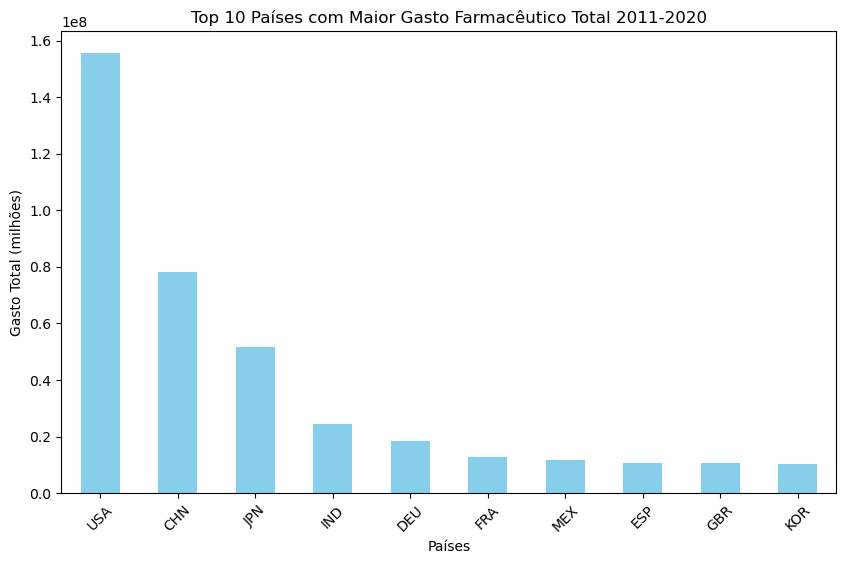

In [29]:
# Grafico de Barras com os 10 países que mais gastaram
plt.figure(figsize=(10, 6))
top_10_paises.plot(kind="bar", color='skyblue')
plt.title("Top 10 Países com Maior Gasto Farmacêutico Total 2011-2020")
plt.xlabel("Países")
plt.ylabel("Gasto Total (milhões)")
plt.xticks(rotation=45)
plt.show()

In [56]:
# Os 15 países que mais gastaram
top_15_paises = gastos_por_pais.nlargest(15).index 

df_top_15 = df_filtrado[df_filtrado['PAIS'].isin(top_15_paises)]

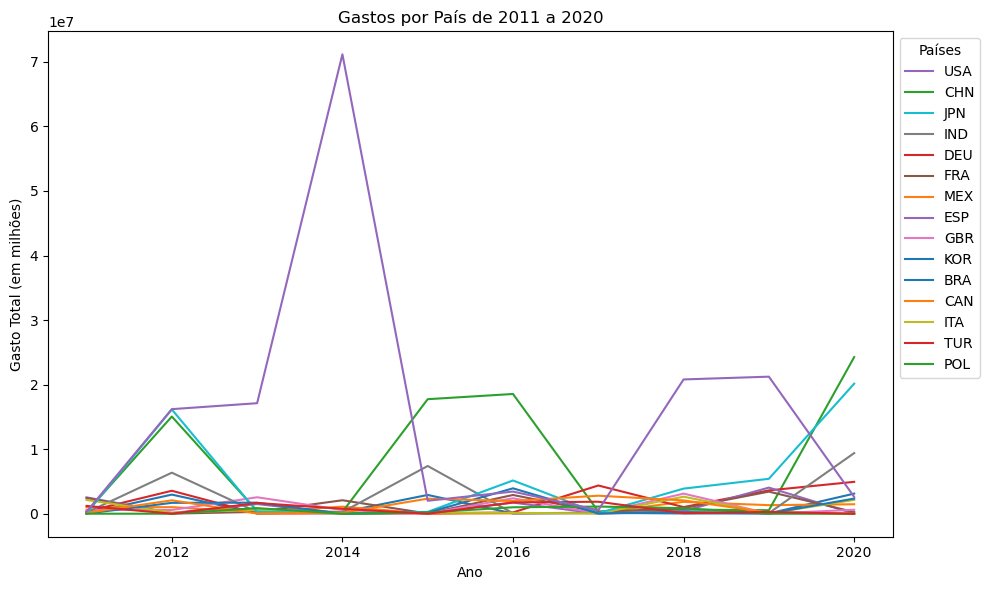

In [61]:
# Criando gráfico de linha para mostrar o gasto total por país ao longo dos anos
plt.figure(figsize=(10, 6))

# Armazenando os rótulos de países e suas linhas
linhas = []
rotulos = []

# Plotando a relação de gastos por país
for pais in df_top_15['PAIS'].unique():
    pais_data = df_top_15[df_top_15['PAIS'] == pais]
    linha, = plt.plot(pais_data['ANO'], pais_data['GASTO_TOTAL'], label=pais)
    linhas.append(linha)
    rotulos.append(pais)
    
# Ordenar os rótulos e linhas de acordo com os gastos totais
gastos_totais = gastos_por_pais[top_15_paises]  # Gasto total para os 15 países
ordenados = gastos_totais.sort_values(ascending=False).index.tolist()  # Ordenar por gasto total

# Reorganizar as linhas e rótulos de acordo com a ordem desejada
linhas_ordenadas = [linhas[rotulos.index(pais)] for pais in ordenados]
rotulos_ordenados = [pais for pais in ordenados]

# Adicionando título e rótulos
plt.title('Gastos por País de 2011 a 2020')
plt.xlabel('Ano')
plt.ylabel('Gasto Total (em milhões)')

# Exibindo a legenda
plt.legend(linhas_ordenadas, rotulos_ordenados, title="Países", loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.tight_layout()
plt.show()